# Twitter Sentiment Analysis

#### Sentiment analysis is a technique that uses Natural Language Processing(NLP) to understand the emotional aspects of text. This is away for computers to figure ut if a piece of writing is positive, negative or neutral

## Importing necessary libraries 

In [47]:

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


## Loading the dataset

In [2]:
Tdata = pd.read_csv("C:/Users/ADMIN/OneDrive/Desktop/Mike/data/Twitter_Data.csv.zip")
Tdata.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## Data Pre-processing

In [4]:
# Displaying the data inforamtion

Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
# Cheking missing values

Tdata.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
# Handling the missing values in clean_text columns

Tdata["clean_text"].fillna(0, inplace = True)

In [9]:
# Dropping na in category column

Tdata.dropna(subset=['category'], inplace=True)

In [14]:
# Check and remove duplicate

print(Tdata.duplicated().sum())

Tdata.drop_duplicates(inplace = True)

0


## Word Cloud Analysis

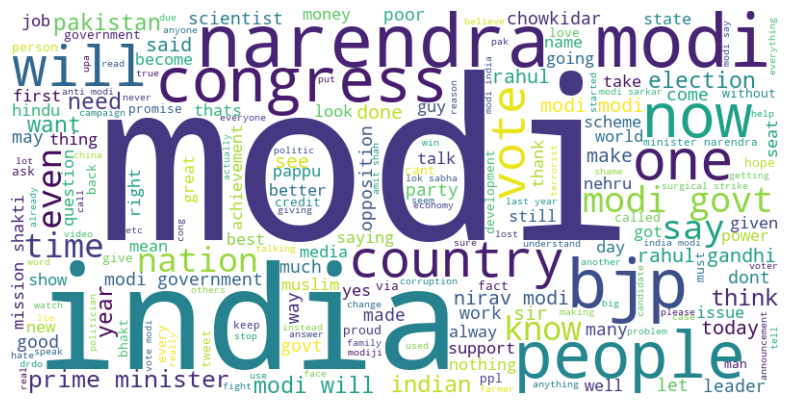

In [23]:
# converting all tweets to text strings
tweet_text = ' '.join( str(tweet_text) for tweet_text in Tdata['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords = set(STOPWORDS)).generate(tweet_text)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Training and testing our model (Logistic regression)

### Here I split the dataset into training and testing set, use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert the text data into numerical features, which can be used by machine learning models, then train a logistic regression model on the training data, finally evaluate the model's performance on the test data using accuracy score and classification report.

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Tdata['clean_text'], Tdata['category'], test_size = 0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype(str))
X_test_tfidf = tfidf_vectorizer.transform(X_test.astype(str))

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9222580150329805
              precision    recall  f1-score   support

        -1.0       0.91      0.82      0.86      7177
         0.0       0.91      0.98      0.94     10997
         1.0       0.94      0.93      0.93     14421

    accuracy                           0.92     32595
   macro avg       0.92      0.91      0.91     32595
weighted avg       0.92      0.92      0.92     32595



c:\ProgramData\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion matrix

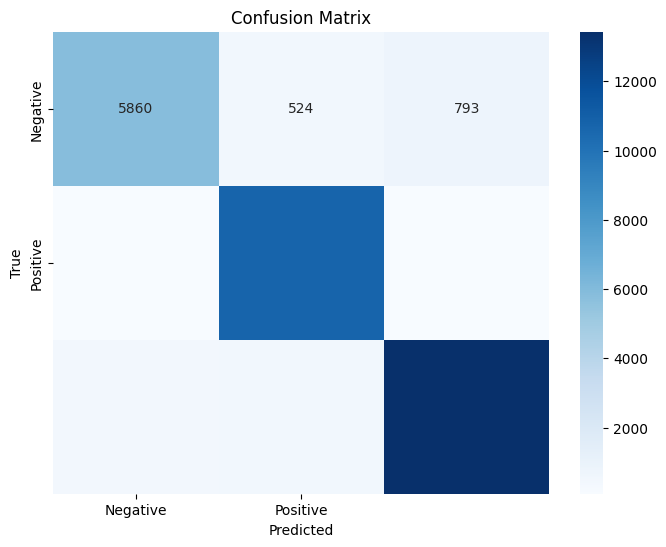

In [38]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Feature Importance

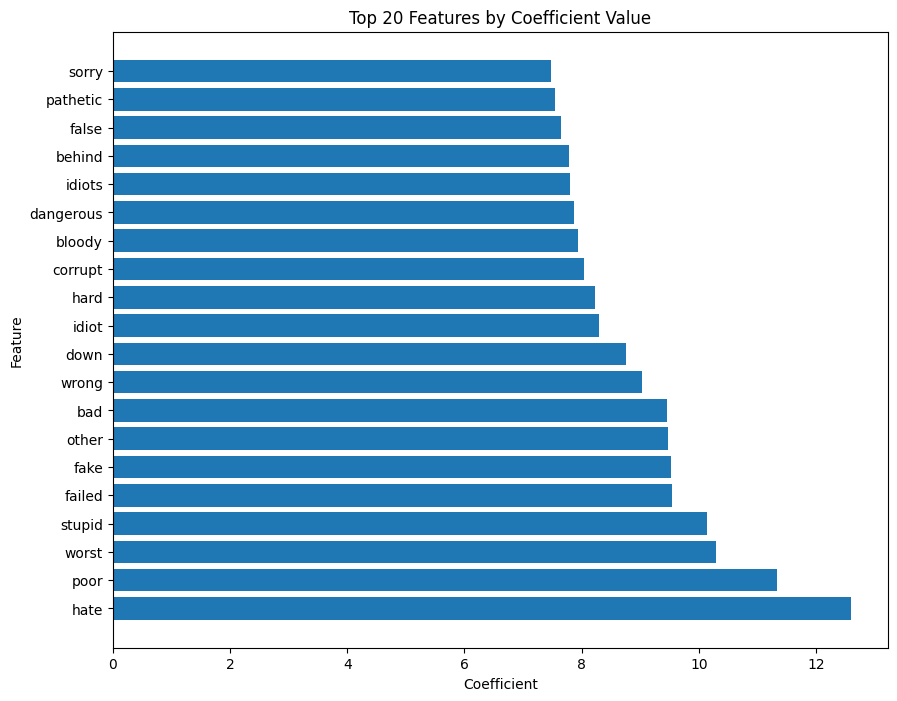

In [42]:
# Get feature names from TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients of the logistic regression model
coefficients = model.coef_[0]

# Combine feature names and coefficients into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort DataFrame by absolute coefficient values
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top N features
top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Coefficient'][:top_n])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top {} Features by Coefficient Value'.format(top_n))
plt.show()